# Getting Started

## Objective
Analyze salaries in the data domain. Answer questions like:
1. What range of Job Titles available and salary range by location
2. Old or new company - who are investing in data?

## About the Dataset

Source: https://www.kaggle.com/datasets/andrewmvd/data-scientist-jobs

# Imports

In [1]:
import pandas as pd#
import missingno
import matplotlib.pyplot as plt

# Configs

In [2]:
DATA_PATH = "Data/DataScientist.csv"

# Data Import

In [3]:
df = pd.read_csv(DATA_PATH)
df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


# Data Quality Check

## Null Values

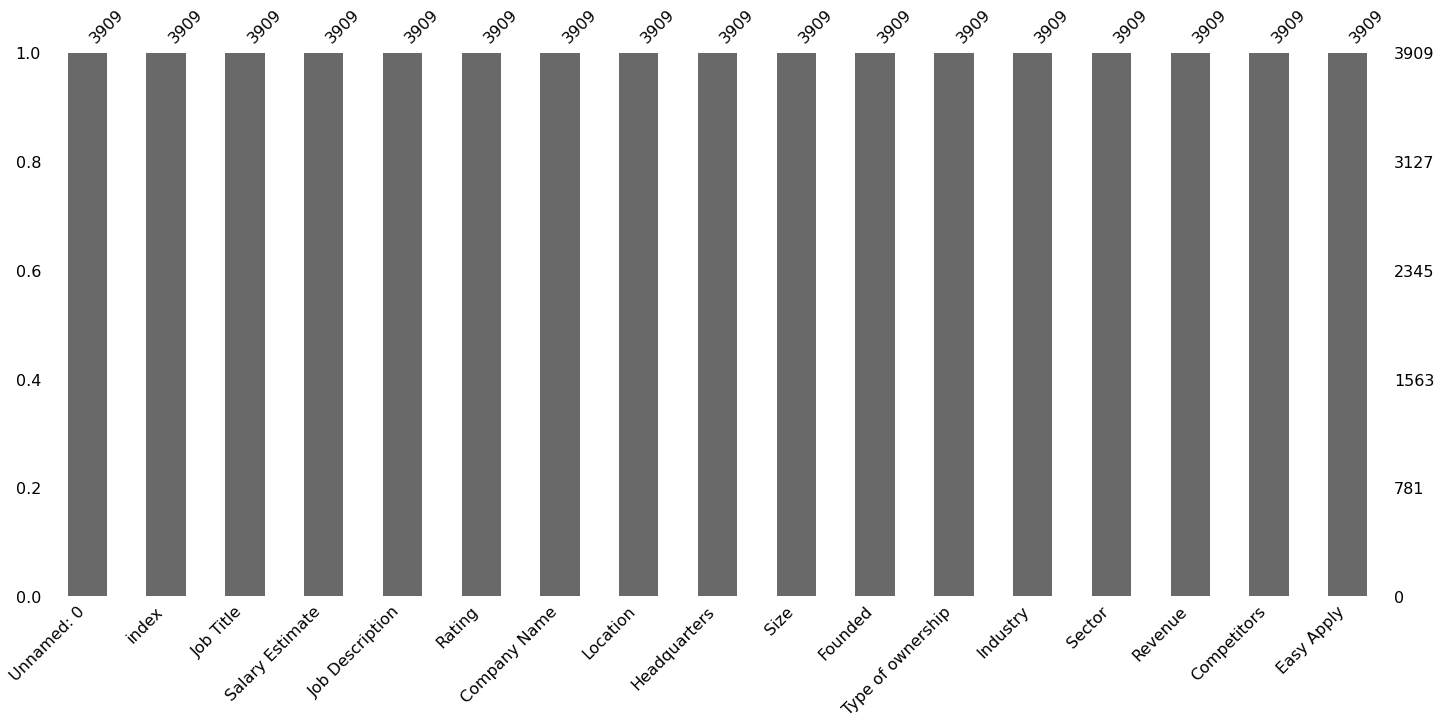

In [5]:
missingno.bar(df)
plt.show() # To remove the annoying <AxesSubplot:>

**Comments:**

1. We can drop first two columns and easy apply (the last column)
2. The Salary may vary directly according to Location, seniority (which can be found in the Title), Revenue

In [6]:
df.drop(columns=['Unnamed: 0', 'index', 'Easy Apply'], inplace=True)

## Cardinality Check

 ### Job Title

In [7]:
print("There are {} unique job titles in this dataset.".format(len(df['Job Title'].unique())))

There are 2079 unique job titles in this dataset.


**Comments:**

Based on this observation, there are many unique titles since the dataset has 3909 data points. Let's see the top 10 most frequent job titles.

In [8]:
df['Job Title'].value_counts()[:10]

Data Scientist                   274
Data Engineer                    260
Data Analyst                     246
Senior Data Scientist             91
Machine Learning Engineer         47
Senior Data Analyst               47
Big Data Engineer                 41
Business Intelligence Analyst     39
Senior Data Engineer              37
Sr. Data Scientist                23
Name: Job Title, dtype: int64

... and the bottom 10 titles

In [9]:
df['Job Title'].value_counts()[-10:]

Scientist, Quality Control                                      1
Senior Data Engineer (Healthcare Domain experience required)    1
Data Science Specialist USA                                     1
Permanent Job: People Analytics Data Scientist                  1
Ergonomics Scientist                                            1
Network Security System/Data Analyst                            1
Data Scientist Active Secret Clearance                          1
NLP Data Scientist                                              1
Modeling and Simulation / MBSE Tools Data Scientist             1
Data Engineer for Industrial Image Data - Columbus, OH          1
Name: Job Title, dtype: int64

**Comments:**

There are a few invalid job titles here I am assuming since clinical lab scientists are not data scientists in general sense.

Solution? -> Keep Data Analyst, Data Scientist, Data Engineer, Machine Learning Engineer, Business Intelligence Analyst as the prime titles, extract them from titles with extra information and store them in one column, the discarded parts into another. Storing the extra information is for tracking the seniority levels embedded in the titles.

In [10]:
LIST_JOB_TITLES = ['Data Analyst', 'Data Scientist', 'Data Engineer', 
                   'Machine Learning Engineer', 'Business Intelligence Analyst']

Now before that I will check if there are any dataanalyst or datascientist and similar mistakes before proceeding.

In [11]:
def title_exists(title:str) -> bool:
    all_job_titles = ",".join(df['Job Title'])
    if title in all_job_titles:
        return True
    return False

In [12]:
title_exists('dataanalyst'), title_exists('DataAnalyst'), title_exists('data analyst')

(False, False, False)

I checked a few more and it seems like the job titles are properly formatted, so we can continue with out objective.

In [13]:
def filter_job_title(title:str, titles_cat_list: list) -> None:
    for each_cat in titles_cat_list:
        if each_cat in title:
            extras = title.replace(each_cat, '').strip()
            if extras == '':
                extras = None
            return each_cat, extras
        else:
            return 'Others', 'Others'

In [14]:
'''TEST METHOD'''
print(filter_job_title("Senior Data Analyst", LIST_JOB_TITLES))
print(filter_job_title("IT Storage Data Analyst / Architect - IT Engineer, Sr Staff", LIST_JOB_TITLES))
print(filter_job_title("Research Engineering Scientist", LIST_JOB_TITLES))
print(filter_job_title("Senior Applied Machine Learning Engineer", LIST_JOB_TITLES))

('Data Analyst', 'Senior')
('Data Analyst', 'IT Storage  / Architect - IT Engineer, Sr Staff')
('Others', 'Others')
('Others', 'Others')


In [15]:
df['Job Title Category'], df['Job Title Extras'] = zip(*df['Job Title'].apply(lambda x: filter_job_title(x, LIST_JOB_TITLES)))

In [16]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job Title Category,Job Title Extras
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,Others,Others
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,Others,Others
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,Others,Others
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",Data Analyst,None
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",Others,Others


Now, we need to determine the seniority level of the jobs. Let's create a word cloud and check the words that appear in the extras.